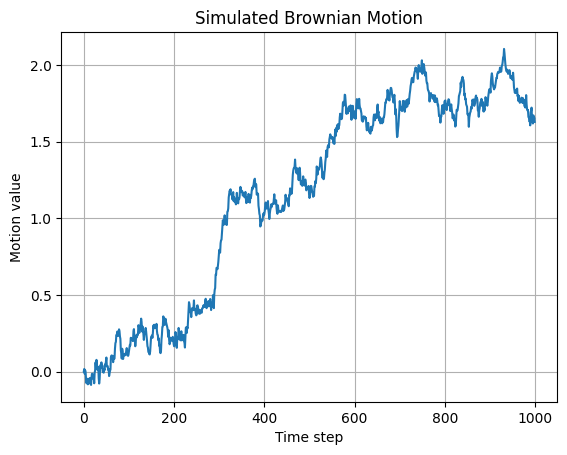

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility (so the result is the same every time)
np.random.seed(4)

# Number of time steps in the simulation
n = 1000

# Scaling factor: 1/sqrt(n) helps ensure the variance of the process is stable
sqn = 1 / np.sqrt(n)

# Generate n random values from a standard normal distribution (mean=0, std=1)
z_values = np.random.randn(n)

# Initialize the Brownian motion value
Yk = 0

# List to store Brownian motion values over time
sb_motion = []

# Simulate Brownian motion using a simple summation of scaled random steps
for k in range(n):
    Yk = Yk + sqn * z_values[k]  # Add scaled random noise
    sb_motion.append(Yk)         # Store the result

# Plot the Brownian motion path
plt.plot(sb_motion)
plt.title("Simulated Brownian Motion")
plt.xlabel("Time step")
plt.ylabel("Motion value")
plt.grid(True)
plt.show()


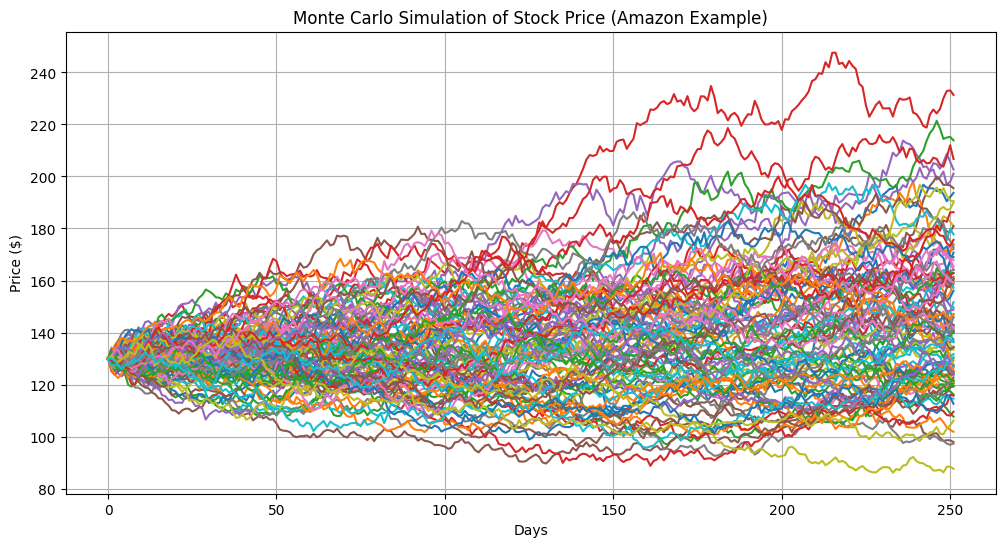


📊 After 1 year:
Expected Price: $146.45
Minimum Price:  $87.62
Maximum Price:  $231.33


In [3]:
# 📈 Monte Carlo Simulation for Stock Price Prediction
# Using Geometric Brownian Motion (GBM) Model

import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# -----------------------------
# Step 1: Initialize Parameters
# -----------------------------

# Initial stock price (e.g., Amazon current price)
S0 = 130.0  # Starting price in dollars

# Annual expected return (mean growth rate)
mu = 0.12  # 12% expected return per year

# Annual volatility (standard deviation)
sigma = 0.2  # 20% annual volatility

# Time horizon (in years)
T = 1  # 1 year forecast

# Number of time steps (days in a year for trading)
N = 252  # trading days

# Time step size (delta t)
dt = T / N

# Number of simulations to run
n_simulations = 100

# -----------------------------
# Step 2: Simulate Price Paths
# -----------------------------

# Create a matrix to store all simulations
price_paths = np.zeros((N, n_simulations))

# Loop over each simulation
for sim in range(n_simulations):
    prices = [S0]  # Start each path at the initial stock price
    for _ in range(1, N):
        # Calculate the next price using GBM formula
        random_shock = np.random.normal(0, 1)
        dS = prices[-1] * (mu * dt + sigma * np.sqrt(dt) * random_shock)
        prices.append(prices[-1] + dS)
    price_paths[:, sim] = prices

# -----------------------------
# Step 3: Visualize the Results
# -----------------------------

plt.figure(figsize=(12, 6))
plt.plot(price_paths)
plt.title('Monte Carlo Simulation of Stock Price (Amazon Example)')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# -----------------------------
# Step 4: Analyze Final Outcomes
# -----------------------------

# Final stock prices after 1 year
final_prices = price_paths[-1]

# Basic statistics
expected_price = np.mean(final_prices)
min_price = np.min(final_prices)
max_price = np.max(final_prices)

print(f"\n📊 After 1 year:")
print(f"Expected Price: ${expected_price:.2f}")
print(f"Minimum Price:  ${min_price:.2f}")
print(f"Maximum Price:  ${max_price:.2f}")


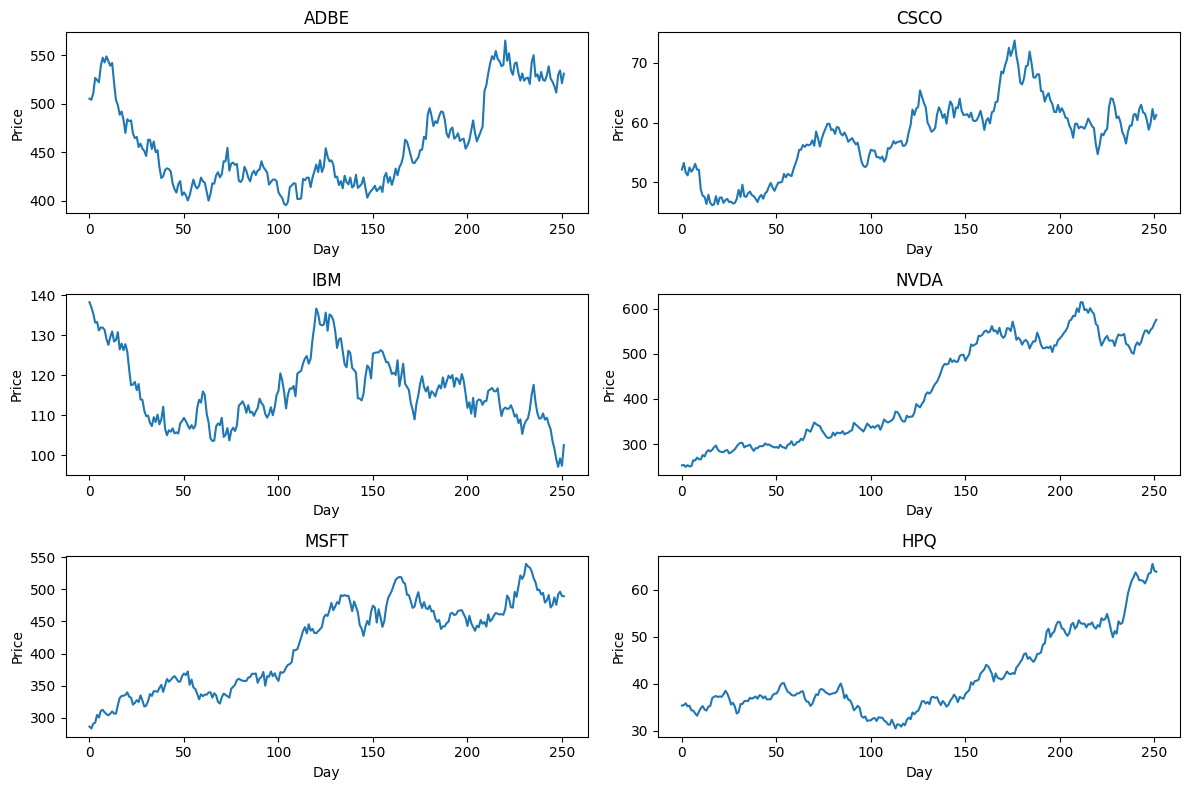

Sample of daily returns:
         ADBE      CSCO       IBM      NVDA      MSFT       HPQ
247 -0.012567 -0.027156 -0.026534 -0.012439 -0.023693  0.019606
248  0.035809  0.019024 -0.019017  0.014464  0.033951  0.002268
249  0.008600  0.038688  0.021573  0.008370  0.008880  0.030051
250 -0.024718 -0.027471 -0.018488  0.018404 -0.013600 -0.022334
251  0.018857  0.011759  0.053148  0.013203 -0.000615 -0.003373
Value-at-Risk (VaR) for ADBE at 95% confidence is: $-408866389.03
Value-at-Risk (VaR) for CSCO at 95% confidence is: $-308750954.58
Value-at-Risk (VaR) for IBM at 95% confidence is: $-770476862.66
Value-at-Risk (VaR) for NVDA at 95% confidence is: $381957128.32
Value-at-Risk (VaR) for MSFT at 95% confidence is: $53018152.95
Value-at-Risk (VaR) for HPQ at 95% confidence is: $126514257.09


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulate stock closing price data for 6 stocks over 252 trading days (like 2021)
np.random.seed(42)  # for reproducible results
days = 252
stocks = ['ADBE', 'CSCO', 'IBM', 'NVDA', 'MSFT', 'HPQ']

# Generate random walk price data starting around different values
prices = {}
for stock, start_price in zip(stocks, [500, 50, 140, 250, 280, 35]):
    # daily returns ~ small random normal noise
    returns = np.random.normal(loc=0.0005, scale=0.02, size=days)
    price = start_price * np.cumprod(1 + returns)  # cumulative product simulates price path
    prices[stock] = price

# Create a DataFrame with simulated stock prices
StockClose = pd.DataFrame(prices)

# --- Step 1: Plot stock price trends ---
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
for i, stock in enumerate(stocks):
    row = i // 2
    col = i % 2
    axs[row, col].plot(StockClose[stock])
    axs[row, col].set_title(stock)
    axs[row, col].set_xlabel('Day')
    axs[row, col].set_ylabel('Price')
plt.tight_layout()
plt.show()

# --- Step 2: Calculate daily returns (percentage change) ---
StockReturns = StockClose.pct_change().dropna()  # drop first NaN row
print("Sample of daily returns:")
print(StockReturns.tail())

# --- Step 3: Set portfolio parameters ---
PortfolioValue = 1_000_000_000  # $1 Billion
ConfidenceLevel = 0.95
WorkingDays = 252

# --- Step 4: Calculate mean and std dev of daily returns ---
Mu = StockReturns.mean()         # Mean daily return for each stock
Sigma = StockReturns.std()       # Std dev of daily return for each stock

# --- Step 5: Annualize mean and std dev ---
AnnualMu = Mu * WorkingDays
AnnualSigma = Sigma * np.sqrt(WorkingDays)

# --- Step 6: Calculate VaR using inverse normal quantile ---
INPD = norm.ppf(1 - ConfidenceLevel, AnnualMu, AnnualSigma)

# --- Step 7: Calculate Value at Risk ---
VaR = PortfolioValue * INPD

# Round results for better readability
RoundVaR = np.round(VaR, 2)

# --- Step 8: Display VaR for each stock ---
for stock, var in zip(stocks, RoundVaR):
    print(f"Value-at-Risk (VaR) for {stock} at {int(ConfidenceLevel*100)}% confidence is: ${var}")

